In [91]:
#Librerias que vamos a utilizar
import numpy as np
import pyhdf.SD
from pyhdf.SD import SD,SDC #Necesitamos la libreria pyhdf para leer archivos y SD una clase
import glob #una libreria que usamos
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
#Lectura de archivos de calibrated radiance

#Ruta donde se encuentran los archivos hdf
DataPath = 'archivos'

#Generamos una variable con todos los archivos de la carpeta
Filelist = glob.glob(DataPath+'/*')

#Mostramos por pantalla
print(Filelist)

['archivos/MOD021KM.A2022224.1430.006.2022225012914.hdf', 'archivos/MOD021KM.A2022091.1415.006.2022092022447(2).hdf']


In [93]:
#Elegimos el archivo con el que vamos a trabajar segun el indice 

n_file = 0

#Abrimos el archivo: SD una clase de la libreria pyhdf junto con el READ lo utilizamos
#para leer el archivo

File = SD(Filelist[n_file],SDC.READ)

#Mostramos informacion de nuestro archivo hdf

print(File.info()) 


(31, 58)


Nuestro archivo hdf contiene 31 sds (Datasets). Para ver esto de forma mas detallada utilizamos la funcion "visualiza_hdf" que nos devuelve una tabla con la informacion de los sds.

In [63]:
def visualiza_hdf(File):
    
    #El modulo datasets (proviene de la libreria pyhdf) me devuelve informacion sobre que
    #hay dentro del hdf. 
    datasets = {"Datasets": list(File.datasets().keys())}
    
    #Lo transformamos a un dataframe para visualizar
    info_file = pd.DataFrame(datasets)
    
    return info_file

visualiza_hdf(File)

,Datasets
0,Latitude
1,Longitude
2,EV_1KM_RefSB
3,EV_1KM_RefSB_Uncert_Indexes
4,EV_1KM_Emissive
5,EV_1KM_Emissive_Uncert_Indexes
6,EV_250_Aggr1km_RefSB
7,EV_250_Aggr1km_RefSB_Uncert_Indexes
8,EV_250_Aggr1km_RefSB_Samples_Used
9,EV_500_Aggr1km_RefSB


Para calcular nuestro indice vamos a necesitar el sds de "EV_500_Aggr1km_RefSB" en el cual vamos a tener valores de reflectancia. Y mas aun las bandas que necesitamos.

In [103]:
muestra_atributos_sds(File,"gflags")

,Atributos
,
_FillValue,255
Bit 7(MSB),1 = invalid input data
Bit 6,1 = no ellipsoid intersection
Bit 5,1 = no valid terrain data
Bit 4,1 = DEM missing or of inferior quality
Bit 3,1 = invalid sensor range


In [64]:
#Funcion que pide como argumento un archivo hdf y el dataset que queramos

def selecciona_sds_hdf(File,sds):
    
    #Seleccionamos el dataset con "select" metodo de la libreria pyhdf
    sds_seleccionado = File.select(sds)
    
    return sds_seleccionado

In [65]:
#Toma como argumento un archivo hdf y el dataset que desee extraer

def extrae_datos_hdf(File,sds):
    
    #Seleccionamos el dataset con la funcion
    dataset = selecciona_sds_hdf(File,sds)
    
    #Extraemos los datos con el metodo get de pyhdf
    sds_datos = dataset.get()
    
    #Devuelve los datos y su dimension
    return sds_datos,sds_datos.shape

Para ver que informacion "atributos" tenemos en nuestro dataset vamos a utilizar la funcion "muestra_atributos_sds" la cual nos entrega una tabla donde los visualizamos.

In [66]:
def selecciona_atributos_sds(File,sds):
    
    #Seleccionamos el dataset
    dataset = selecciona_sds_hdf(File,sds)
    
    #Utilizamos el metodo attribute, nos devuelve un diccionario con una descripcion
    #global de cada atributo adjunto al archivo hdf
    dic_atributos = dataset.attributes()
    
    return dic_atributos
    

In [67]:
#Input : File y un dataset
def muestra_atributos_sds(File,sds):
    
    dic_atributos = selecciona_atributos_sds(File,sds)
        
    #Tomamos las llaves y valores del diccionario y los transformamos en listas
    #para luego generar una tabla y visualizarlo
    columna1 = list(dic_atributos.keys())
    columna2 = list(dic_atributos.values())
    
    #Generamos una tabla/dataframe
    df = pd.DataFrame({"":columna1,"Atributos":columna2})
    df = df.set_index("")
    
    #Regresa una tabla donde se muestran los atributos del dataset
    return df

In [68]:
muestra_atributos_sds(File,"EV_500_Aggr1km_RefSB")

,Atributos
,
long_name,Earth View 500M Aggregated 1km Reflective Sola...
units,none
valid_range,"[0, 32767]"
_FillValue,65535
band_names,"3,4,5,6,7"
radiance_scales,"[0.04213636741042137, 0.034364331513643265, 0...."
radiance_offsets,"[-0.0, -0.0, -0.0, -0.0, -0.0]"
radiance_units,Watts/m^2/micrometer/steradian
reflectance_scales,"[6.510046659968793e-05, 5.9409430832602084e-05..."


In [69]:
#Se elige un file hdf, sds: el dataset que queramos y el atributo del dataset
def extrae_atributos_sds(File,sds,atributo):
    
    #Utilizamos la funcion para generar un diccionario con los atributos
    dic_atributos = selecciona_atributos_sds(File,sds)
    
    #Del diccionario elegimos el atributo que queremos
    attr = dic_atributos[atributo]
    
    #Devuelve una lista con los valores de mi atributo
    return attr

In [70]:
#Extrae los valores de la banda seleccionada ya convertidos a reflectancia

#File hdf, sds: dataset,canal deseado, nombre de atributo con las bandas
def extrae_banda(File,sds,band,nombre_atributo):
    
    #Extraemos los valores de reflectancia sin conversion
    REF = extrae_datos_hdf(File,sds)[0]
    
    #Extraemos los numeros de bandas que tenemos. Ej:band 1, band2
    #Spliteamos para operar en ellas
    n_bands = extrae_atributos_sds(File,sds,nombre_atributo).split(",")
    
    #Elegimos la banda
    
    posicion_band = n_bands.index(str(band))
    
    
    #Hacemos la conversion
    
    rad_off_ref= extrae_atributos_sds(File,sds,"reflectance_offsets")[posicion_band]
    
    rad_scales_ref = extrae_atributos_sds(File,sds,"reflectance_scales")[posicion_band]
    
    canal = rad_scales_ref * (REF[posicion_band,:,:] - rad_off_ref)
    
    return canal
    
    
    
    

In [71]:
def indice_nbr(File,sds,nombre_atributo):
    
    #Extraemos las bandas con las cuales vamos a trabajar
    canal_5 = extrae_banda(File,sds,5,nombre_atributo)
    canal_7 = extrae_banda(File,sds,7,nombre_atributo)
    
    #Calculamos el indice NBR
    nbr = (canal_5 - canal_7) / (canal_5 + canal_7)
    
    #array con los valores de nbr
    return nbr    

Una vez que conocemos que tenemos dentro de nuestros archivos hdf, podemos calcular el NBR para las fechas que queramos

In [72]:
#La lista donde habiamos almacenado los archivos hdf 

#Indice del archivo donde tenemos datos previos al foco del incendio
n_file = 1

#Nuestro archivo con informacion sobre antes del evento
pre_archivo = SD(Filelist[n_file],SDC.READ)

#NBR previo al foco del incendio
nbr_pre = indice_nbr(pre_archivo,"EV_500_Aggr1km_RefSB","band_names")

In [73]:
#Indice del archivo donde tenemos datos posteriores al foco del incendio
n_file = 0

#Nuestro archivo con informacion sobre antes del evento
post_archivo = SD(Filelist[n_file],SDC.READ)

#NBR post foco al incendio
nbr_post = indice_nbr(post_archivo,"EV_500_Aggr1km_RefSB","band_names")

In [74]:
#Diferencia de NBR
d_nbr = nbr_pre - nbr_post

Lectura de archivos de Geolocalizacion


In [104]:
#Ruta donde se encuentran los archivos hdf
DataPath = 'geolocation'

#Generamos una variable con todos los archivos de la carpeta
Filelist_geo = glob.glob(DataPath+'/*')

#Mostramos por pantalla
print(Filelist_geo)

['geolocation/MOD03.A2022091.1415.006.2022091212727(1).hdf', 'geolocation/MOD03.A2022091.1415.006.2022091212727.hdf']


In [132]:
#Elegimos el archivo con el que vamos a trabajar segun el indice 

n_file = 0

#Abrimos el archivo

File_geo = SD(Filelist_geo[n_file],SDC.READ)

#Mostramos informacion de nuestro archivo hdf

print(File_geo.info()) 

(46, 27)


In [43]:
visualiza_hdf(File_geo)

,Datasets
0,Latitude
1,Longitude
2,Scan Offset
3,Track Offset
4,Height Offset
5,Height
6,SensorZenith
7,SensorAzimuth
8,Range
9,SolarZenith


In [79]:
LAT_pre = extrae_datos_hdf(File_geo,"Latitude")[0]
LON_pre = extrae_datos_hdf(File_geo,"Longitude")[0]

In [77]:
LAT_post = extrae_datos_hdf(File_geo,"Latitude")[0]
LON_post = extrae_datos_hdf(File_geo,"Longitude")[0]

In [47]:
from matplotlib.ticker import FixedLocator
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


Graficos

In [48]:
# Cargamos los límites de países y provincias para poder graficarlas en los mapas

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none',edgecolor='black')

countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',edgecolor='blue')

/home/user/.local/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


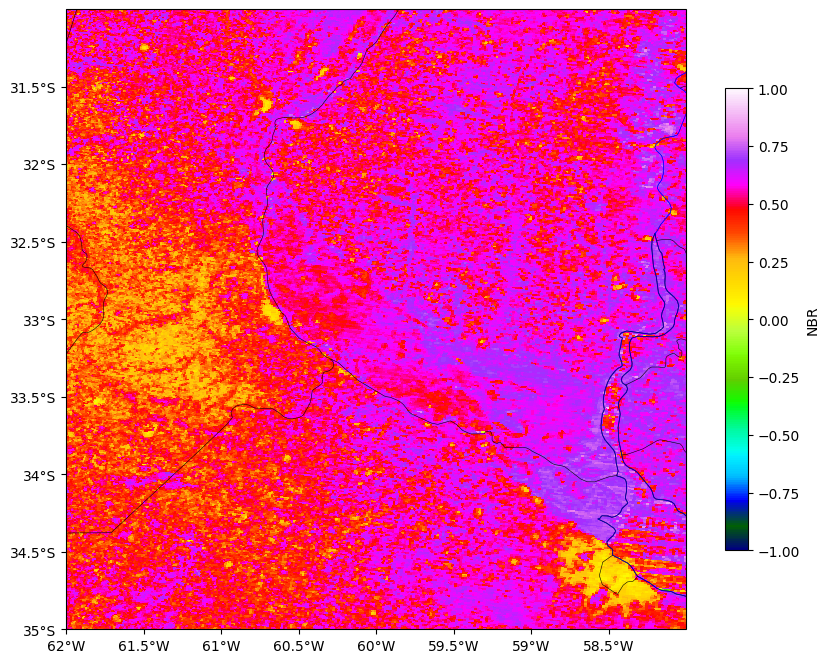

In [80]:
# Definimos los limites del area a visualizar
latnorth=-31
latsouth=-35
lonwest=-62
loneast=-58

fig=plt.figure(figsize=(10,10))
    
ax1 = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
    
# Definimos el área de graficado y a qué proyección hay que transformar las coordenadas lat/lon

ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())

# Graficamos
    
cm=ax1.pcolormesh(LON_pre,LAT_pre, nbr_pre,cmap='gist_ncar',vmin=-1,vmax=1)

# Agregamos la línea de costas
ax1.coastlines(resolution='10m',linewidth=0.6)
    
# Agregamos los límites de los países
ax1.add_feature(countries,linewidth=0.4)
    
# Agregamos los límites de las provincias
ax1.add_feature(states_provinces,linewidth=0.4)
    
# Definimos donde aparecen los ticks con las latitudes y longitudes
ax1.set_yticks(np.arange(latsouth,latnorth,0.5), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,0.5), crs=ccrs.PlateCarree())
    
# Le damos formato a las etiquetas de los ticks
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Agregamos la barra de colores 
cbar=plt.colorbar(cm,shrink=0.6)
cbar.set_label('NBR',fontsize=10)

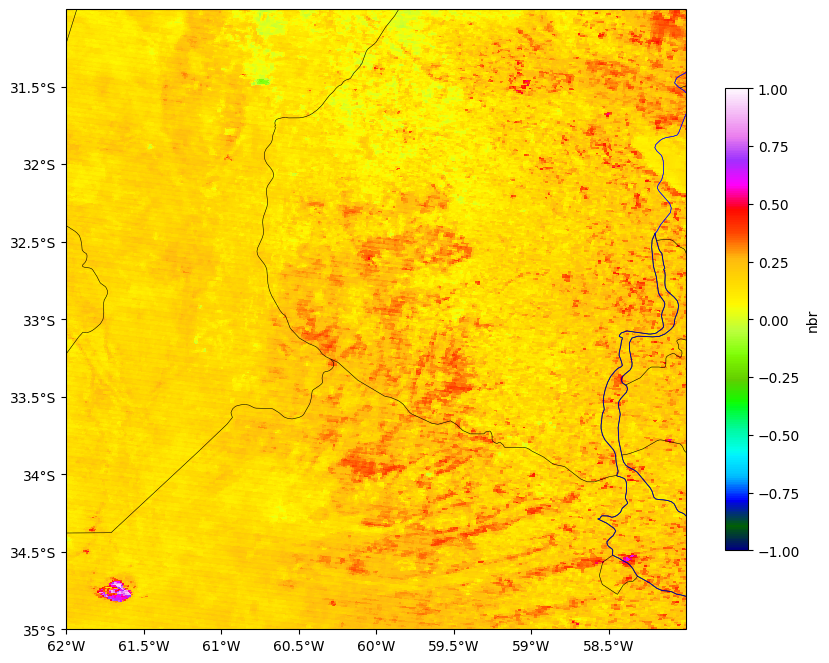

In [81]:
# Definimos los limites del area a visualizar
latnorth=-31
latsouth=-35
lonwest=-62
loneast=-58

fig=plt.figure(figsize=(10,10))
    
ax1 = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
    
# Definimos el área de graficado y a qué proyección hay que transformar las coordenadas lat/lon

ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())

# Graficamos
    
cm=ax1.pcolormesh(LON_post,LAT_post, nbr_post,cmap='gist_ncar',vmin=-1,vmax=1)

# Agregamos la línea de costas
ax1.coastlines(resolution='10m',linewidth=0.6)
    
# Agregamos los límites de los países
ax1.add_feature(countries,linewidth=0.4)
    
# Agregamos los límites de las provincias
ax1.add_feature(states_provinces,linewidth=0.4)
    
# Definimos donde aparecen los ticks con las latitudes y longitudes
ax1.set_yticks(np.arange(latsouth,latnorth,0.5), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,0.5), crs=ccrs.PlateCarree())
    
# Le damos formato a las etiquetas de los ticks
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Agregamos la barra de colores 
cbar=plt.colorbar(cm,shrink=0.6)
cbar.set_label('nbr',fontsize=10)

In [ ]:
# Definimos los limites del area a visualizar
latnorth=-31
latsouth=-35
lonwest=-62
loneast=-58

fig=plt.figure(figsize=(10,10))
    
ax1 = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
    
# Definimos el área de graficado y a qué proyección hay que transformar las coordenadas lat/lon

ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())

# Graficamos
    
cm=ax1.pcolormesh(LON,LAT, nbr,cmap='gist_ncar',vmin=-0.2,vmax=1)

# Agregamos la línea de costas
ax1.coastlines(resolution='10m',linewidth=0.6)
    
# Agregamos los límites de los países
ax1.add_feature(countries,linewidth=0.4)
    
# Agregamos los límites de las provincias
ax1.add_feature(states_provinces,linewidth=0.4)
    
# Definimos donde aparecen los ticks con las latitudes y longitudes
ax1.set_yticks(np.arange(latsouth,latnorth,0.5), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,0.5), crs=ccrs.PlateCarree())
    
# Le damos formato a las etiquetas de los ticks
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Agregamos la barra de colores 
cbar=plt.colorbar(cm,shrink=0.6)
cbar.set_label('dNBR',fontsize=10)